In [1]:
import pandas as pd
import spline
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from merge_script import modify_first_column

In [12]:
# 归类
import os
import shutil

file_classes = ['a1t', 'a6t', 'a7t', 'a8t']

""" 1-WALK 6-RUN 7-JUMP 8-SIT """
def categorize_and_move_files(source_directory):
    # 遍历所有子文件夹，获取所有文件
    for root, dirs, files in os.walk(source_directory):
        for file in files:
            # 这里假设按文件的扩展名分类，可以根据需要修改
            file_class = file[:3]
            if file_class in file_classes:
                # print(dirs)
                target_folder = os.path.join(root, file_class)
                
                # 创建目标文件夹（如果不存在）
                if not os.path.exists(target_folder):
                    os.makedirs(target_folder)
                
                # 构建源文件和目标文件路径
                source_file_path = os.path.join(root, file)
                target_file_path = os.path.join(target_folder, file)
                
                # 移动文件到目标文件夹
                shutil.move(source_file_path, target_file_path)
                print(f"Moved {source_file_path} to {target_file_path}")
            else:
                file_path = os.path.join(root, file)
                os.remove(file_path)

# 使用示例
source_directory = 'datasets/USC-HAD-clean'
categorize_and_move_files(source_directory)


Moved datasets/USC-HAD-clean\Subject1\a1t1.csv to datasets/USC-HAD-clean\Subject1\a1t\a1t1.csv
Moved datasets/USC-HAD-clean\Subject1\a1t2.csv to datasets/USC-HAD-clean\Subject1\a1t\a1t2.csv
Moved datasets/USC-HAD-clean\Subject1\a1t3.csv to datasets/USC-HAD-clean\Subject1\a1t\a1t3.csv
Moved datasets/USC-HAD-clean\Subject1\a1t4.csv to datasets/USC-HAD-clean\Subject1\a1t\a1t4.csv
Moved datasets/USC-HAD-clean\Subject1\a1t5.csv to datasets/USC-HAD-clean\Subject1\a1t\a1t5.csv
Moved datasets/USC-HAD-clean\Subject1\a6t1.csv to datasets/USC-HAD-clean\Subject1\a6t\a6t1.csv
Moved datasets/USC-HAD-clean\Subject1\a6t2.csv to datasets/USC-HAD-clean\Subject1\a6t\a6t2.csv
Moved datasets/USC-HAD-clean\Subject1\a6t3.csv to datasets/USC-HAD-clean\Subject1\a6t\a6t3.csv
Moved datasets/USC-HAD-clean\Subject1\a6t4.csv to datasets/USC-HAD-clean\Subject1\a6t\a6t4.csv
Moved datasets/USC-HAD-clean\Subject1\a6t5.csv to datasets/USC-HAD-clean\Subject1\a6t\a6t5.csv
Moved datasets/USC-HAD-clean\Subject1\a7t1.csv to 

In [6]:
# 删掉mat文件
import os

def delete_mat_files(directory):
    # 遍历所有子文件夹和文件
    for root, dirs, files in os.walk(directory):
        # print(root, dirs, files)
        for file in files:
            # 检查文件扩展名是否为 .mat
            if file.endswith('.mat'):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted {file_path}")

# 使用示例
directory = 'datasets/USC-HAD-clean'
delete_mat_files(directory)


datasets/USC-HAD-clean ['Subject1', 'Subject10', 'Subject11', 'Subject12', 'Subject13', 'Subject14', 'Subject2', 'Subject3', 'Subject4', 'Subject5', 'Subject6', 'Subject7', 'Subject8', 'Subject9'] []
datasets/USC-HAD-clean\Subject1 [] ['a10t1.csv', 'a10t2.csv', 'a10t3.csv', 'a10t4.csv', 'a10t5.csv', 'a11t1.csv', 'a11t2.csv', 'a11t3.csv', 'a11t4.csv', 'a11t5.csv', 'a12t1.csv', 'a12t2.csv', 'a12t3.csv', 'a12t4.csv', 'a12t5.csv', 'a1t1.csv', 'a1t2.csv', 'a1t3.csv', 'a1t4.csv', 'a1t5.csv', 'a2t1.csv', 'a2t2.csv', 'a2t3.csv', 'a2t4.csv', 'a2t5.csv', 'a3t1.csv', 'a3t2.csv', 'a3t3.csv', 'a3t4.csv', 'a3t5.csv', 'a4t1.csv', 'a4t2.csv', 'a4t3.csv', 'a4t4.csv', 'a4t5.csv', 'a5t1.csv', 'a5t2.csv', 'a5t3.csv', 'a5t4.csv', 'a5t5.csv', 'a6t1.csv', 'a6t2.csv', 'a6t3.csv', 'a6t4.csv', 'a6t5.csv', 'a7t1.csv', 'a7t2.csv', 'a7t3.csv', 'a7t4.csv', 'a7t5.csv', 'a8t1.csv', 'a8t2.csv', 'a8t3.csv', 'a8t4.csv', 'a8t5.csv', 'a9t1.csv', 'a9t2.csv', 'a9t3.csv', 'a9t4.csv', 'a9t5.csv']
datasets/USC-HAD-clean\Subjec

(3, 5000)


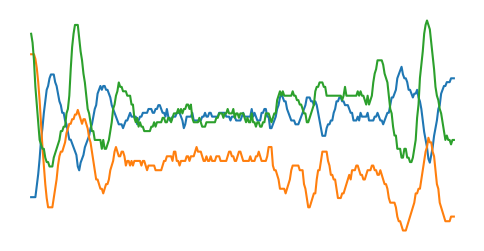

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum) * stage for item in data])
    return np.array(normalized_data)

plt.figure(figsize=(6, 3))

real_data_path = 'datasets/Merge_fold_0720/ByNum_spline3/0/a8t/SIT_891.csv'
real_data_path = 'datasets/USC-HAD-clean/Subject11/a8t/a8t2.csv'
df = pd.read_csv(real_data_path, index_col=0, header=0, usecols= [0,1,2,3])
df = np.array(df).T
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# fuse_df = three_fuse(df)
# r_nor_df = axis_normalization(fuse_df)
r_nor_df = axis_normalization(df)
print(r_nor_df.shape)
plt.plot(r_nor_df[0][1500:1800])
plt.plot(r_nor_df[1][1500:1800])
plt.plot(r_nor_df[2][1500:1800])
plt.axis('off')
plt.savefig("./img/real_s3t2.png", dpi=300, transparent=True)
# plt.plot(r_nor_df[1])
# plt.plot(nor_df[0][:200])
# plt.plot(nor_df_08[0][:200])

(3, 302)
(3, 296)
(3, 314)
(3, 302)
(3, 305)


<Figure size 640x480 with 0 Axes>

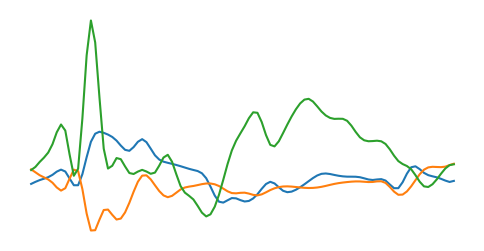

<Figure size 640x480 with 0 Axes>

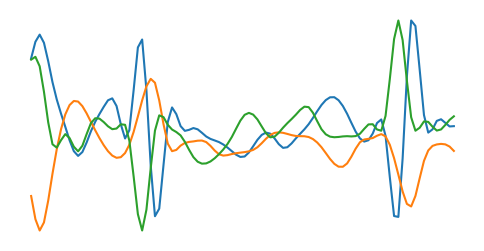

<Figure size 640x480 with 0 Axes>

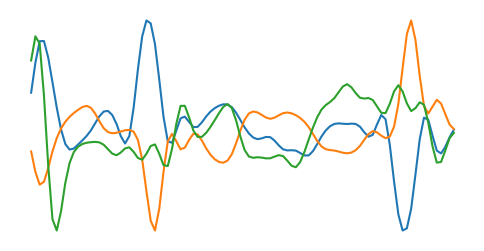

<Figure size 640x480 with 0 Axes>

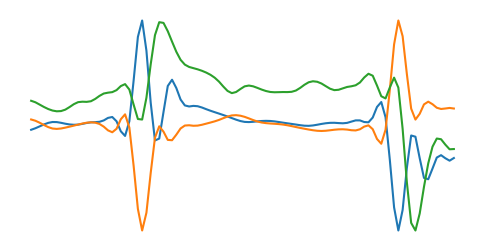

<Figure size 640x480 with 0 Axes>

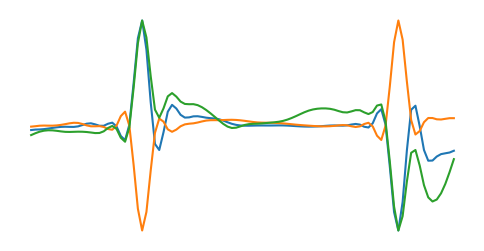

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum) * stage for item in data])
    return np.array(normalized_data)


for i in range(5):
    plt.figure()
    plt.figure(figsize=(6, 3))
    # plt.subplot(2, 3, i+1)
    real_data_path = 'datasets/Merge_fold_0713/ByNum_spline3/'+ str(i) + '/a8t/SIT356_' + str(i)+ '.csv'
    df = pd.read_csv(real_data_path, index_col=0, header=0, usecols= [0,1,2,3])
    df = np.array(df).T
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# fuse_df = three_fuse(df)
# r_nor_df = axis_normalization(fuse_df)
    r_nor_df = axis_normalization(df)
    print(r_nor_df.shape)
    plt.plot(r_nor_df[0][:100])
    plt.plot(r_nor_df[1][:100])
    plt.plot(r_nor_df[2][:100])
    plt.axis('off')
    plt.savefig("./img/sit_356" + str(i) + ".png", dpi=300, transparent=True)
# plt.plot(r_nor_df[1]) 
# plt.plot(nor_df[0][:200])
# plt.plot(nor_df_08[0][:200])